Análise Exploratória - Quantidade

Importação das bibliotecas necessárias

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
df_revenue = pd.read_csv("../data/production_revenue.csv")
df_volume = pd.read_csv("../data/production_volume.csv")
df_volume["date"] = pd.to_datetime(df_volume["date"], format="%b-%Y")
df_revenue["date"] = pd.to_datetime(df_revenue["date"], format="%b-%Y")

df = pd.merge(df_volume, df_revenue, on="date")
df['season'] = df['date'].dt.month.map({
    1: 'Summer', 2: 'Summer', 3: 'Summer',
    4: 'Fall', 5: 'Fall', 6: 'Fall',
    7: 'Winter', 8: 'Winter', 9: 'Winter',
    10: 'Spring', 11: 'Spring', 12: 'Spring'
})

In [62]:
display(df.head(3))
print(f"\n🔍 Dimensões: {df.shape}")
print(f"📅 Período: {df['date'].min()} a {df['date'].max()}")

,date,cheese,milk,dulce_leche,eggs,porks,vegetables,cheese_revenue,milk_revenue,dulce_leche_revenue,eggs_revenue,porks_revenue,vegetables_revenue,season
0,2020-01-01,20,300,5,1,1,10,300,900,50,12,300,20,Summer
1,2020-02-01,25,310,3,2,1,12,375,930,30,24,300,24,Summer
2,2020-03-01,28,320,4,5,1,18,420,960,40,60,300,36,Summer



🔍 Dimensões: (60, 14)
📅 Período: 2020-01-01 00:00:00 a 2024-12-01 00:00:00


In [63]:
# products = ['cheese', 'milk', 'eggs', 'milk', 'porks', 'vegetables']
# fig, axes = plt.subplots(len(products), 1, figsize=(14, 10))

# for ax, products in zip(axes, products):
#     sns.lineplot(data=df, x='date', y=f'{products}', ax=ax, color='royalblue')
#     ax.set_title(f'Produção de {products} (2020-2024)', fontsize=12)
#     ax.set_ylabel('Quantidade')
# plt.tight_layout()

In [64]:
def make_graphic(data: pd.DataFrame, y:str, title:str) -> None:
    plt.figure(figsize=(16,6))
    sns.lineplot(data=data, x="date", y=y, marker="o")
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Units")

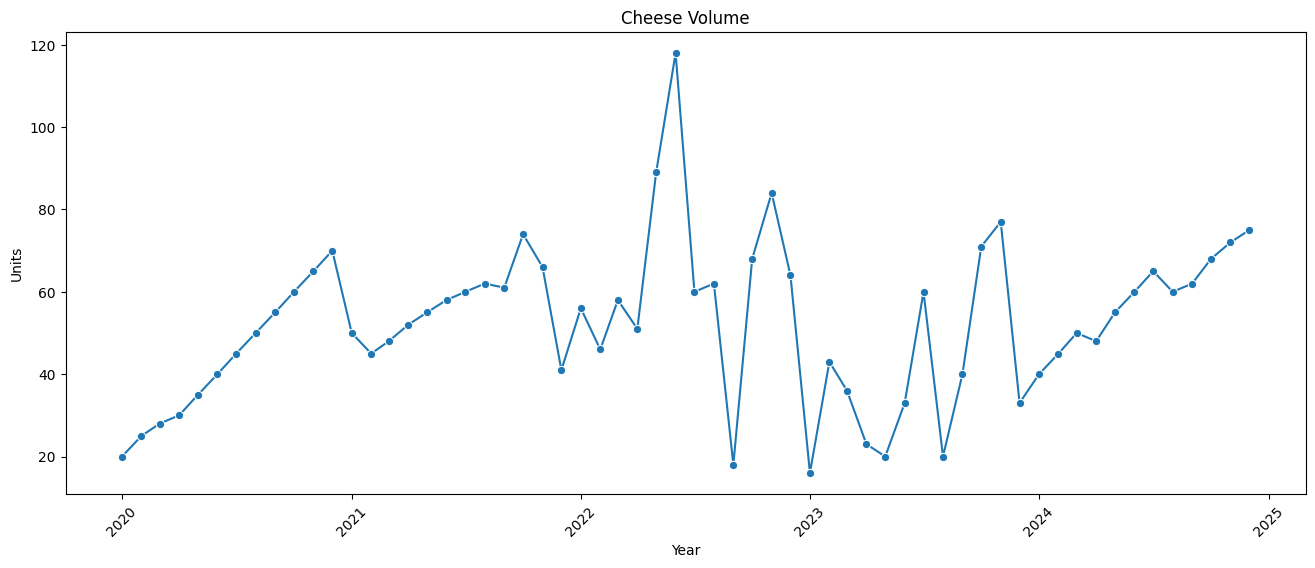

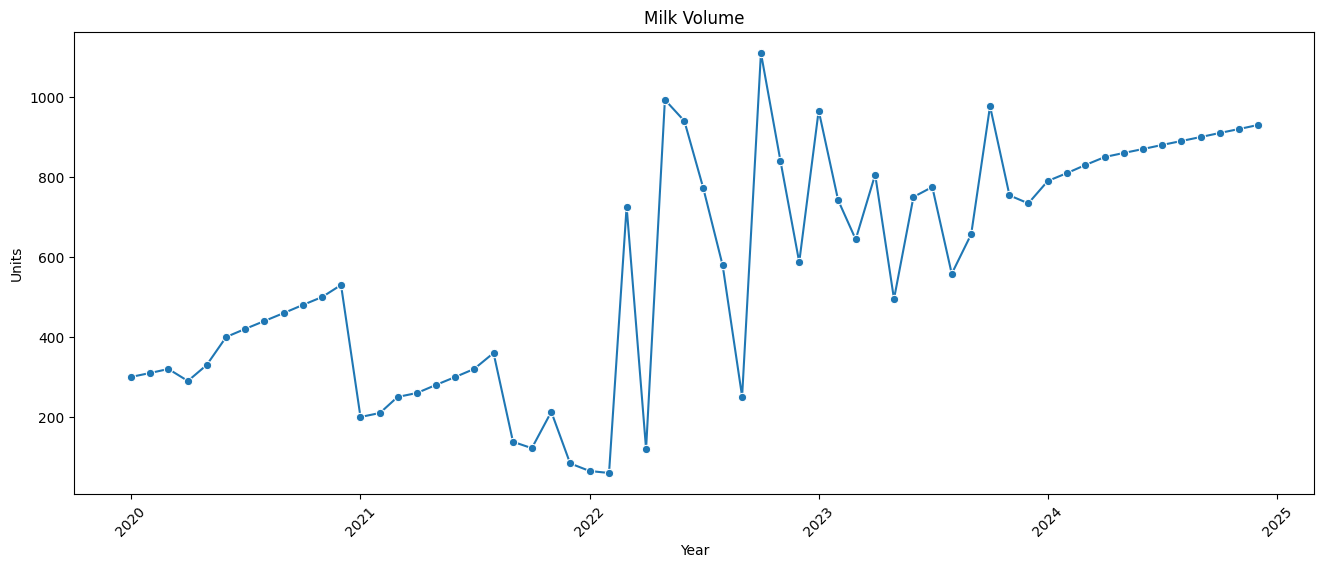

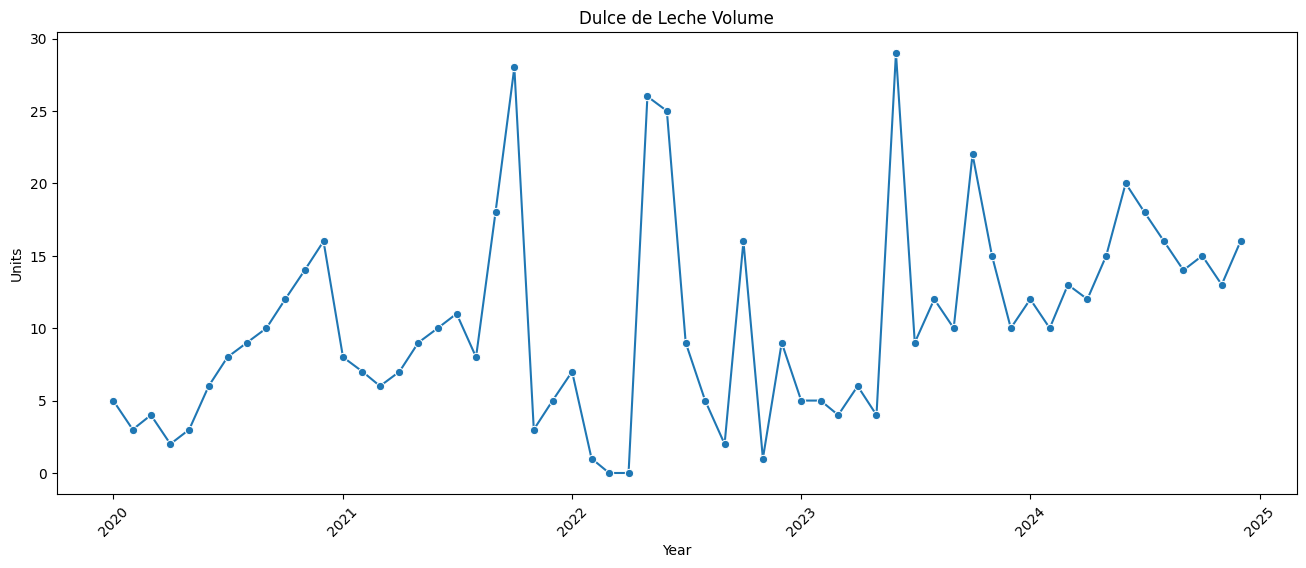

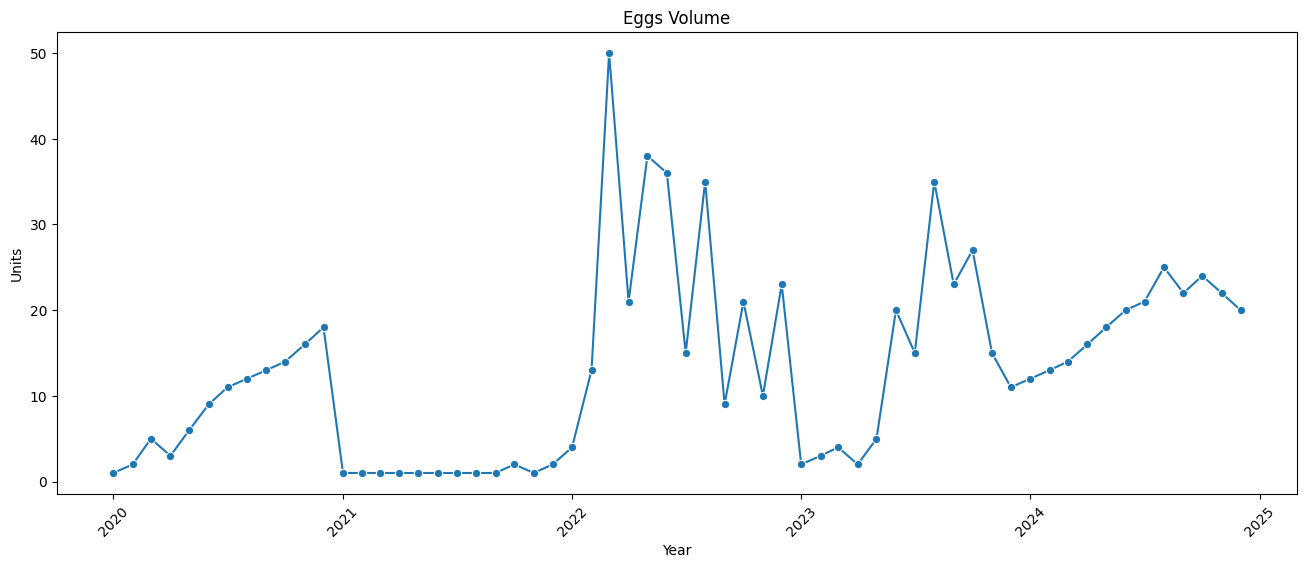

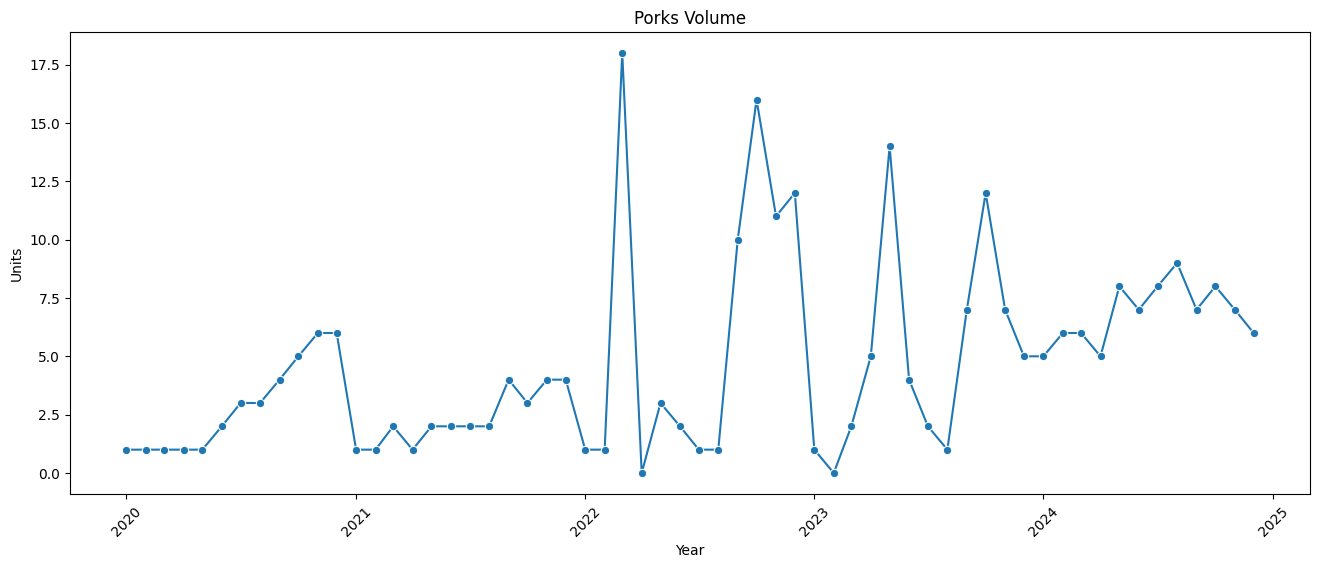

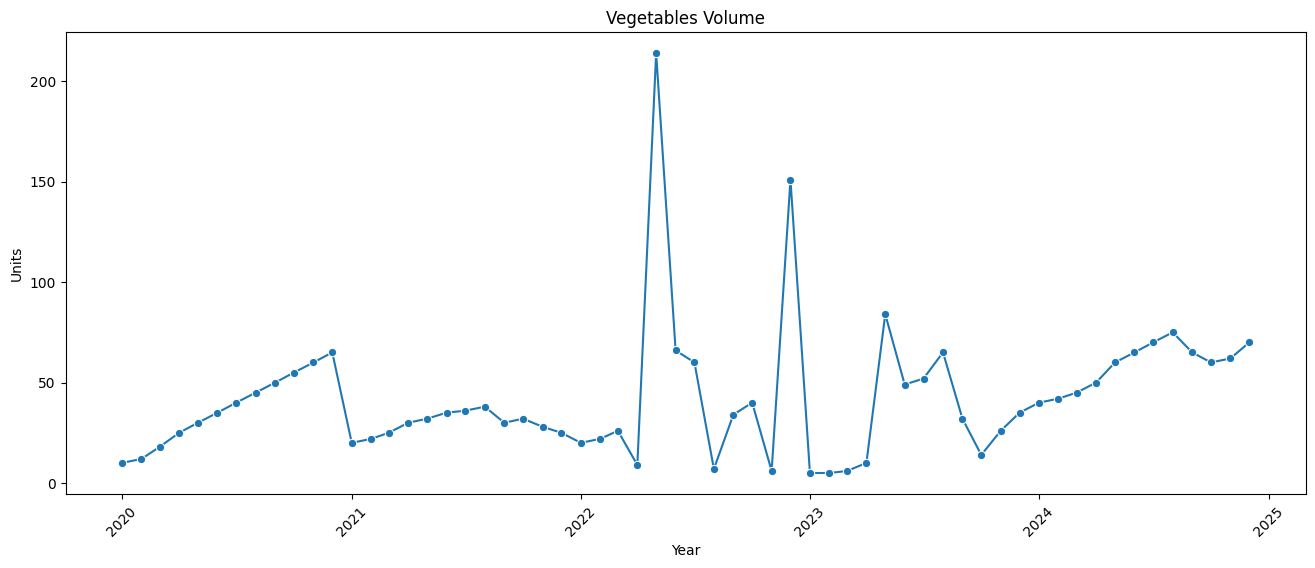

In [65]:
make_graphic(data=df, y="cheese", title="Cheese Volume")
make_graphic(data=df, y="milk", title="Milk Volume")
make_graphic(data=df, y="dulce_leche", title="Dulce de Leche Volume")
make_graphic(data=df, y="eggs", title="Eggs Volume")
make_graphic(data=df, y="porks", title="Porks Volume")
make_graphic(data=df, y="vegetables", title="Vegetables Volume")

Text(0.5, 1.0, 'Products Correlation')

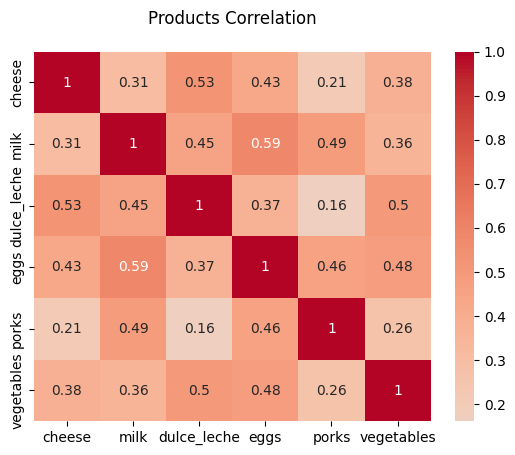

In [66]:
cols_corr = ["cheese", "milk", "dulce_leche", "eggs", "porks", "vegetables"]
sns.heatmap(df[cols_corr].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Products Correlation', pad=20)


Text(0, 0.5, 'Quantidade')

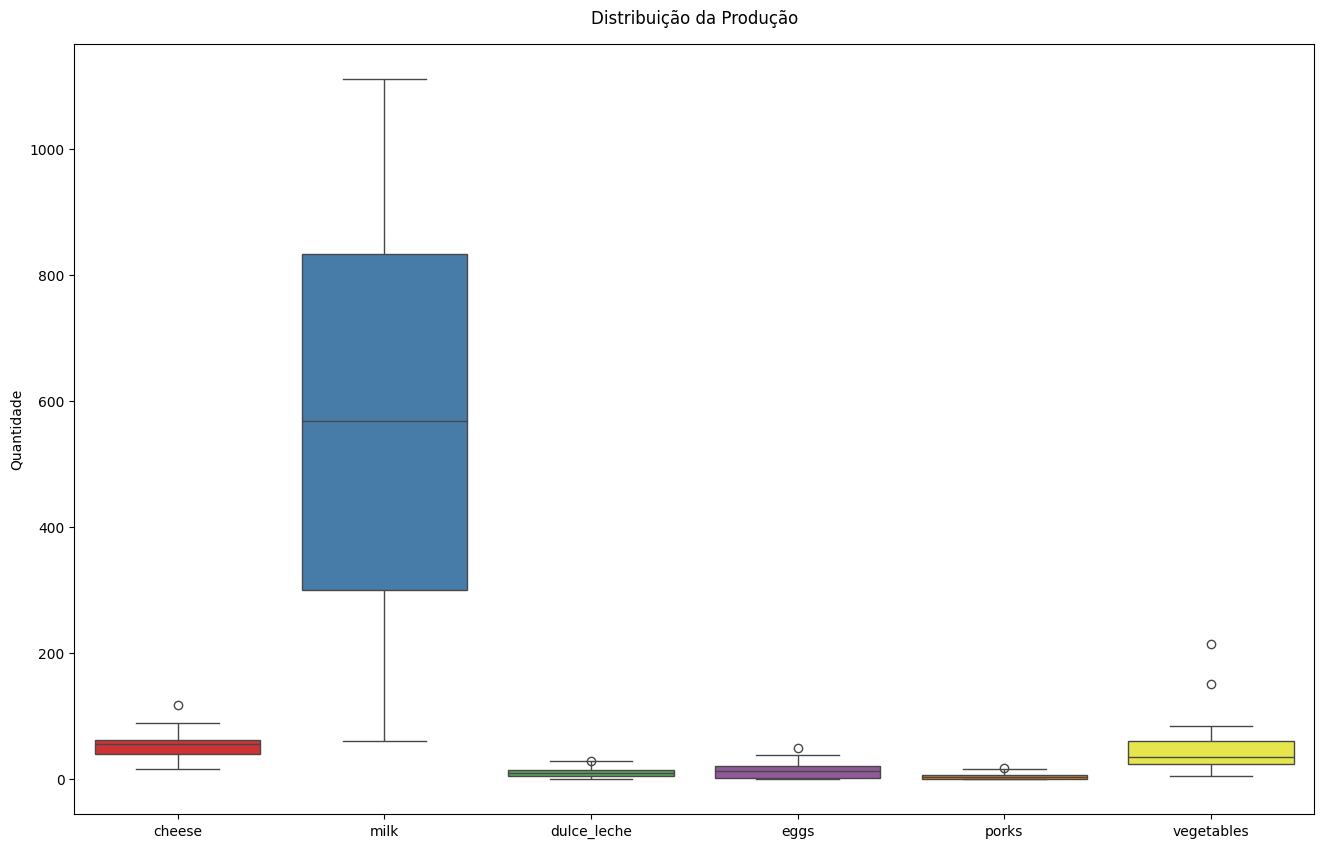

In [67]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df[["cheese", "milk", "dulce_leche", "eggs", "porks", "vegetables"]], palette="Set1")
plt.title('Distribuição da Produção', pad=15)
plt.ylabel('Quantidade')

In [68]:
def cheking_outliers(df: pd.DataFrame, column: str, print_details=True, return_outliers=False):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                       
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificação dos outliers
    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers_df = df[outliers_mask].copy()

    if print_details:
        print(f"\nOutlier Analysis - Column: '{column}'")
        print(f"• 1st Quartile (Q1): {Q1:.2f}")
        print(f"• 3rd Quartile (Q3): {Q3:.2f}")
        print(f"• IQR: {IQR:.2f}")
        print(f"• Lower Bound: {lower_bound:.2f}")
        print(f"• Upper Bound: {upper_bound:.2f}")
        print(f"• Outliers Detected: {len(outliers_df)}")
        
        if not outliers_df.empty:
            print("\nOutliers Statistics:")
            display(outliers_df[[column]].describe().T)
            
        if print_details and not outliers_df.empty:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[column], color='skyblue')
            plt.title(f'Distribution of {column} with Outliers')
            plt.show()
    return outliers_df if return_outliers else None 


Outlier Analysis - Column: 'cheese'
• 1st Quartile (Q1): 40.00
• 3rd Quartile (Q3): 62.50
• IQR: 22.50
• Lower Bound: 6.25
• Upper Bound: 96.25
• Outliers Detected: 1

Outliers Statistics:


,count,mean,std,min,25%,50%,75%,max
cheese,1.0,118.0,NaN,118.0,118.0,118.0,118.0,118.0


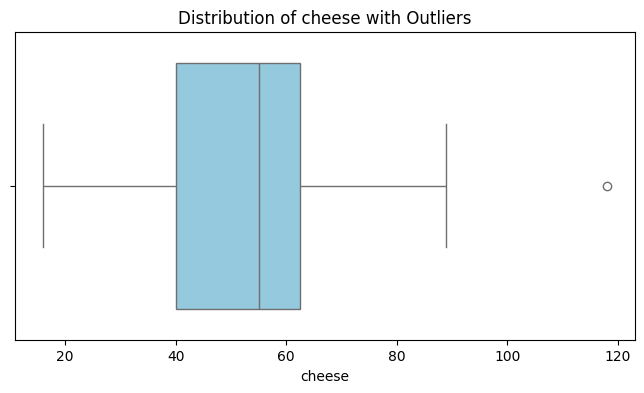

In [69]:
cheking_outliers(df=df, column="cheese")

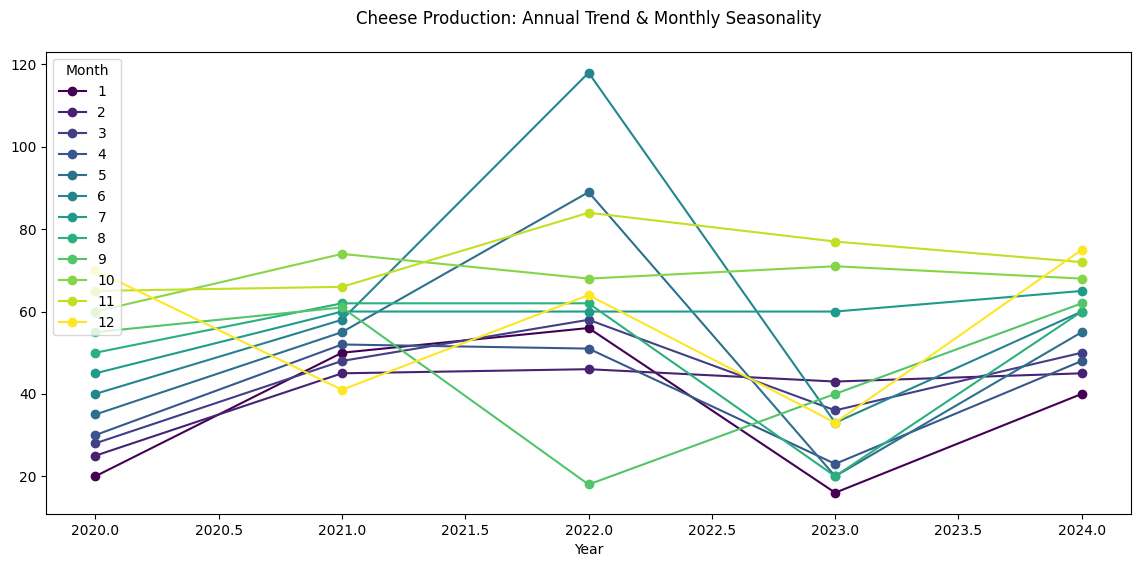

In [70]:

fig, ax = plt.subplots(figsize=(14, 6))
df.groupby([df['date'].dt.year, df['date'].dt.month])['cheese'].mean().unstack().plot(
    ax=ax, cmap='viridis', marker='o'
)
ax.set_title('Cheese Production: Annual Trend & Monthly Seasonality', pad=20)
ax.set_xlabel('Year')
plt.legend(title='Month');

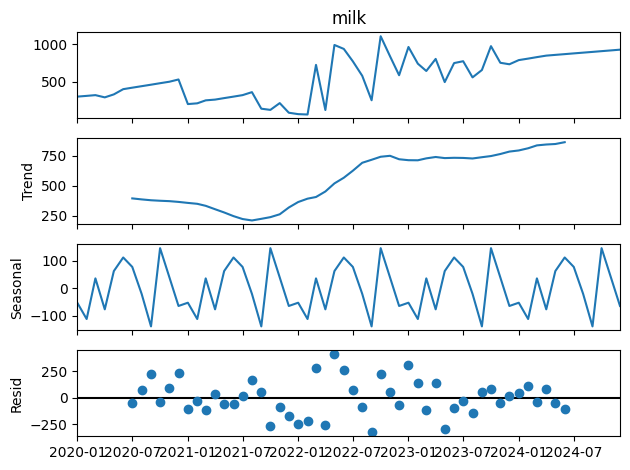

In [71]:
# Decomposição aditiva (produção de leite)
result = seasonal_decompose(df.set_index('date')['milk'], model='additive', period=12)
result.plot();

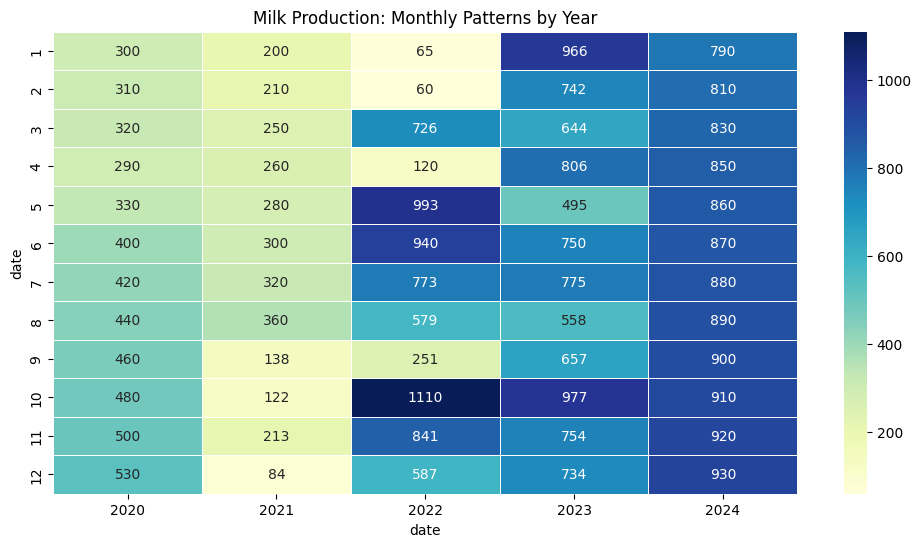

In [72]:
pivot = df.pivot_table(index=df['date'].dt.month, 
                      columns=df['date'].dt.year, 
                      values='milk')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Milk Production: Monthly Patterns by Year');

In [87]:
def make_graphic_kde_season_grid(df: pd.DataFrame, products: list[str]):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10)) 
    axes = axes.flatten()  

    for i, product in enumerate(products):
        ax = axes[i]
        sns.kdeplot(data=df, x=product, hue="season", fill=True, linewidth=1.5, ax=ax)
        ax.set_title(f"{product.capitalize()} over Seasons")

    for j in range(len(products), 6):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

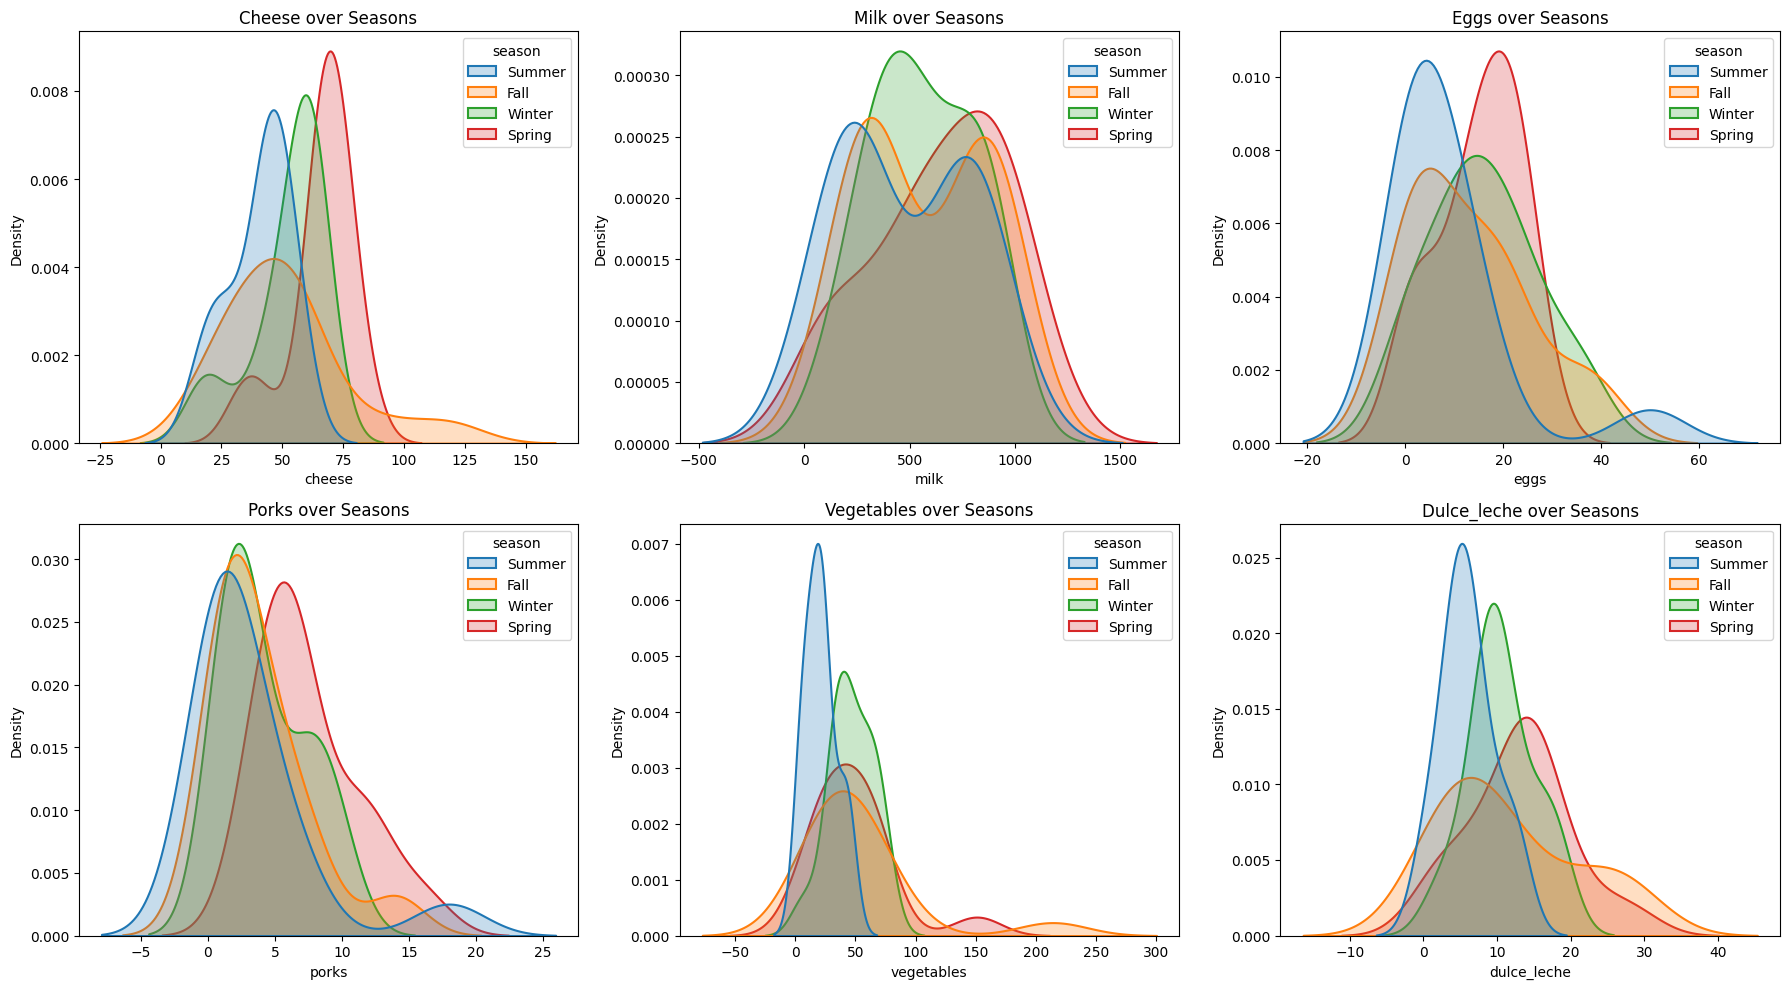

In [88]:
products = ["cheese", "milk", "eggs", "porks", "vegetables", "dulce_leche"]
make_graphic_kde_season_grid(df, products)

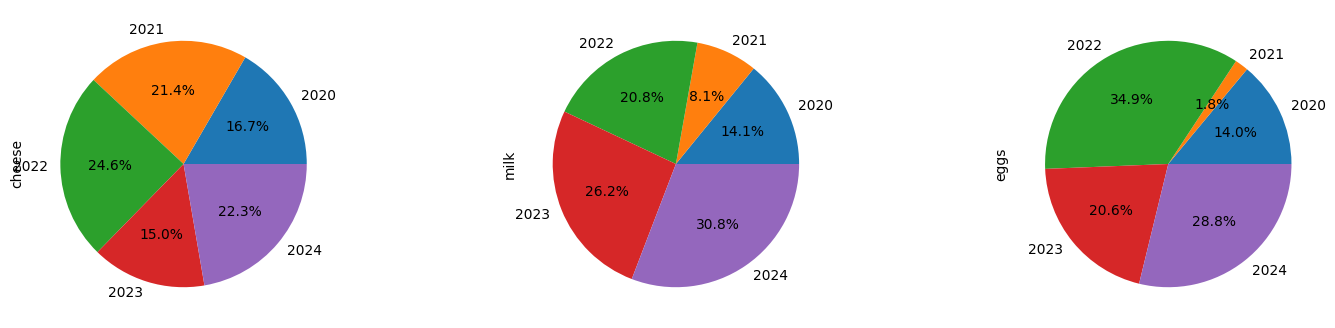

In [95]:
df['year'] = df['date'].dt.year
receita_anual = df.groupby('year')[['cheese', 'milk', 'eggs']].sum()
receita_anual.plot.pie(subplots=True, figsize=(18, 4), autopct='%.1f%%', legend=False);

In [ ]:
# Tabela resumo com crescimento anual
summary = df.groupby(df['date'].dt.year).agg({
    'cheese': ['mean', lambda x: f"{(x.pct_change().mean()*100):.1f}%"],
    'milk': ['sum', 'max']
})
display(summary.style.background_gradient(cmap='Blues'))